<a href="https://colab.research.google.com/github/vanshika7-max/World-Bank-Education-Stats/blob/main/Vanshika_Raj_Team_7_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
path='/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Day 1/dat/'

EdStatsCountry_Series_df = pd.read_csv(path + 'EdStatsCountry-Series.csv')
EdStatsCountry_df = pd.read_csv(path + 'EdStatsCountry.csv')
EdStatsData_df = pd.read_csv(path + 'EdStatsData.csv')
EdStatsFootNote_df = pd.read_csv(path + 'EdStatsFootNote.csv')
EdStatsSeries_df = pd.read_csv(path + 'EdStatsSeries.csv')

*GARBAGE IN, GARBAGE OUT! *

Since there is a huge data for more than hundred years,Let's check the percentage of data in the respective years so that we can take a particular range of data from these years.

Plotting the Graph for the years and the data in the rows.

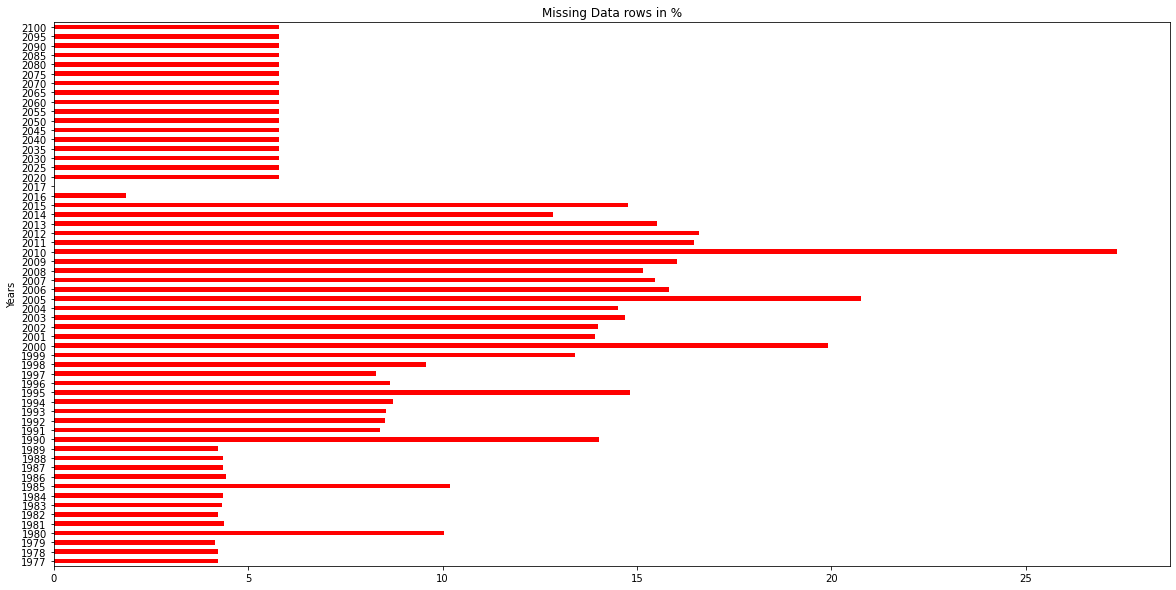

In [4]:
dataset1 = EdStatsData_df.loc[:,'1977':'2100'].notnull().sum()/len(EdStatsData_df)*100
plt.figure(figsize=(20,10))
plt.subplot()
dataset1.plot(kind='barh', color='red')
plt.title('Data rows in %')
plt.ylabel('Years')
plt.show()

***FINDINGS FROM THE ABOVE PLOTTED GRAPH:***

Since 2010 has the highest data in it, lets include it in the analysis.
Taking the analysis from 2010-2017
Now, checking for the garbage unnamed data in every dataframe and dropping it:

In [6]:
EdStatsCountry_Series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [7]:
EdStatsCountry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [29]:
EdStatsData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [9]:
EdStatsFootNote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [10]:
EdStatsSeries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [11]:
EdStatsCountry_Series_df = EdStatsCountry_Series_df.drop(['Unnamed: 3'], axis=1)
EdStatsCountry_Series_df.head(1)

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...


In [12]:
EdStatsCountry_df = EdStatsCountry_df.drop(['Unnamed: 31'], axis=1)
EdStatsCountry_df.head(1)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN


In [13]:
EdStatsFootNote_df = EdStatsFootNote_df.drop(['Unnamed: 4'], axis=1)
EdStatsFootNote_df.head(1)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.


In [14]:
EdStatsSeries_df = EdStatsSeries_df.drop(['Unnamed: 20'], axis=1)
EdStatsSeries_df.head(1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
EdStatsData_df.loc[:,'Country Name' : 'Indicator Code'].describe()

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,El Salvador,SSD,"Population, ages 12-17, total",PRJ.ATT.2024.3.MF
freq,3665,3665,242,242


Overall, 242 countries are present with 3665 indicators.

Now, for removing the duplicates in Country code and indicator code:

In [16]:
countries = EdStatsData_df.loc[:,['Country Name','Country Code']].drop_duplicates()
print (countries.shape)

(242, 2)


In [17]:
indicators = EdStatsData_df.loc[:,['Indicator Name','Indicator Code']].drop_duplicates()
print(indicators.shape)

(3665, 2)


In [ ]:
EdStatsData_df.drop(EdStatsData_df.columns[EdStatsData_df.columns.str.contains('^19','^200','^202')], axis=1)

In [37]:
for col in EdStatsData_df.columns:
  if col!=['Country Name','Country Code','Indicator Name','Indicator Code','2010','2011','2012','2013','2014','2015']:
    del EdStatsData_df[col]

In [38]:
for col in EdStatsData_df.columns:
  # EdStatsData_df1=[]
  if col==['Country Name','Country Code','Indicator Name','Indicator Code','2010','2011','2012','2013','2014','2015']:
    del EdStatsData_df[col]
    # EdStatsData_df1=EdStatsData_df

In [42]:
def get_median(Year1,Year2,Year3,Year4,Year5,Year6):
    lst=[]
    lst.append(Year1)
    lst.append(Year2)
    lst.append(Year3)
    lst.append(Year4)
    lst.append(Year5)
    lst.append(Year6)
    Year_value = pd.Series(lst)
    New_year_value=Year_value.median()
    return New_year_value


In [43]:
EdStatsSeries_df['Indicator Name'].unique()

array(['Barro-Lee: Percentage of female population age 15-19 with no education',
       'Barro-Lee: Percentage of population age 15-19 with no education',
       'Barro-Lee: Percentage of female population age 15+ with no education',
       ..., 'Government expenditure per tertiary student (constant US$)',
       'Government expenditure in secondary institutions education as % of GDP (%)',
       'Government expenditure in tertiary institutions as % of GDP (%)'],
      dtype=object)

In [44]:
array = ['Barro-Lee: Percentage of female population age 15-19 with no education',
       'Barro-Lee: Percentage of population age 15-19 with no education',
       'Barro-Lee: Percentage of female population age 15+ with no education',
       ..., 'Government expenditure per tertiary student (constant US$)',
       'Government expenditure in secondary institutions education as % of GDP (%)',
       'Government expenditure in tertiary institutions as % of GDP (%)']

In [45]:
EdStatsSeries_df=EdStatsSeries_df.loc[EdStatsSeries_df['Indicator Name'].isin(array)]
EdStatsSeries_df

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Tertiary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
Series_code_per_topic=EdStatsSeries_df.groupby('Topic')['Series Code'].count()

Text(0.5, 0, 'Topic')

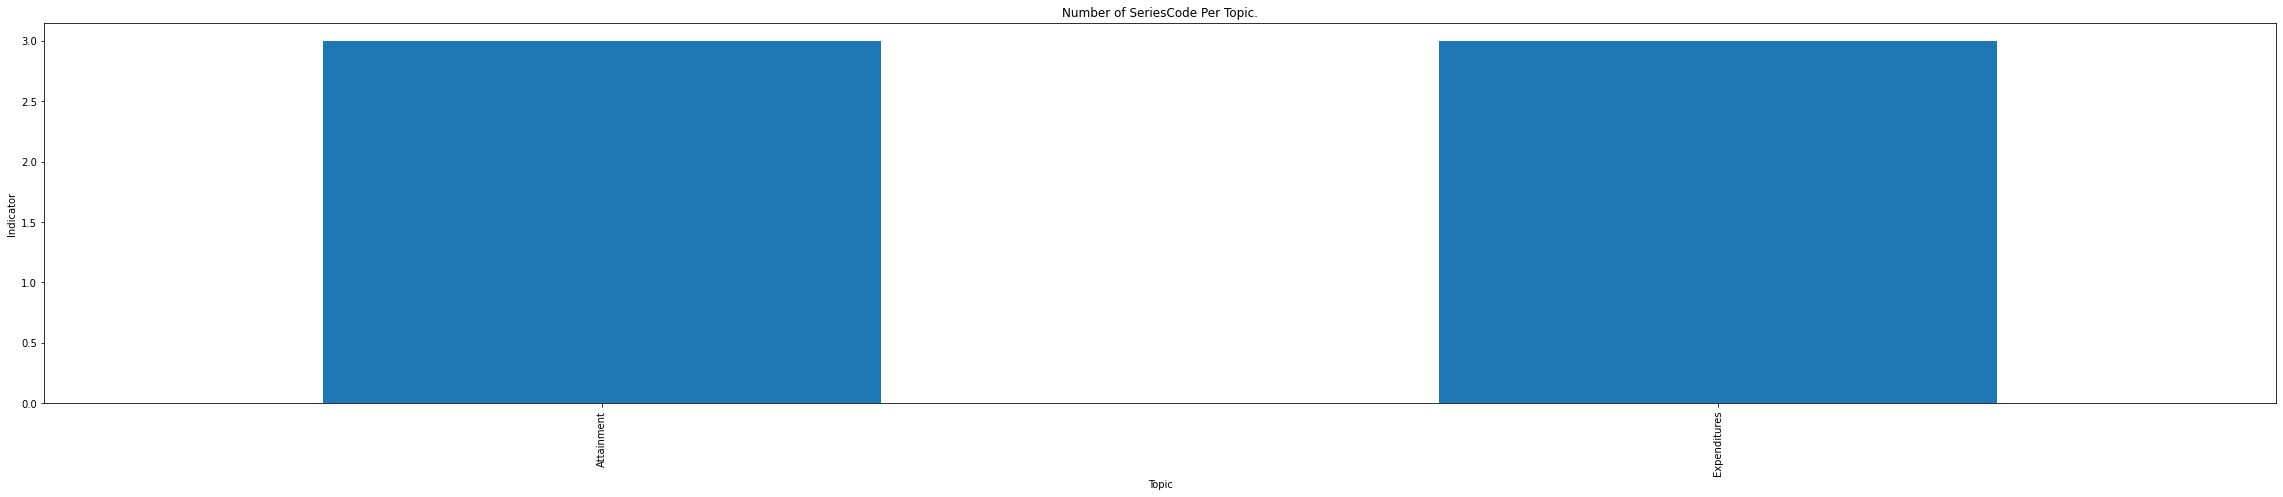

In [53]:
plt.rcParams['figure.figsize'] = (40,7)
Series_code_per_topic.plot(kind='bar')
plt.title('Number of SeriesCode Per Topic.')
plt.ylabel('Indicator')
plt.xlabel('Topic')